### Importing Data

In [ ]:
cd ./drive/MyDrive/

[Errno 2] No such file or directory: './drive/MyDrive/'
/content


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sb
import os
import tqdm
from tqdm import tqdm_notebook
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('./korea_made.csv')
data

,날짜,누적 확진자,누적 사망자,누적 완치자,사망자,확진자,완치자
0,2020-02-01,12,0,0,0.0,0.0,0.0
1,2020-02-02,15,0,0,0.0,3.0,0.0
2,2020-02-03,15,0,0,0.0,0.0,0.0
3,2020-02-04,16,0,0,0.0,1.0,0.0
4,2020-02-05,19,0,0,0.0,3.0,0.0
...,...,...,...,...,...,...,...
293,2020-11-20,30017,501,26263,3.0,363.0,165.0
294,2020-11-21,30403,503,26365,2.0,386.0,102.0
295,2020-11-22,30733,505,26466,2.0,330.0,101.0
296,2020-11-23,31004,509,26539,4.0,271.0,73.0


In [ ]:
df = data.copy()
df.head()

,날짜,누적 확진자,누적 사망자,누적 완치자,사망자,확진자,완치자
0,2020-02-01,12,0,0,0.0,0.0,0.0
1,2020-02-02,15,0,0,0.0,3.0,0.0
2,2020-02-03,15,0,0,0.0,0.0,0.0
3,2020-02-04,16,0,0,0.0,1.0,0.0
4,2020-02-05,19,0,0,0.0,3.0,0.0


In [ ]:
# df = data[data['누적 확진자']>30]
# df = df.reset_index()
# print(df.shape)
# df = df.drop('index', axis = 1)
# df.head()

(281, 8)


In [ ]:
ytrue = df.iloc[:15,5].array
ytrue # 향후 setting에 인지하고 반영

<PandasArray>
[  1.0,  20.0,  53.0, 100.0, 229.0, 169.0, 231.0, 144.0, 284.0, 505.0, 571.0,
 813.0, 586.0, 476.0, 600.0]
Length: 15, dtype: float64

## Approximating Beta

In [ ]:
# beta =  np.linspace(0,1,1000) 후에 grid approx 파트
beta = 0.16

# given_setting
k = 1/4
alpha = 1/4
gamma =  1/14 # I ->R 회복율 = 평균 회복기간의 역수
t = np.arange(1, 16)

# 2/18 31번확진자 나온날 기준으로 초기 SIR 모델 만듦.
S0  = 51839408-31-1 ;I0  = 31; R0 = 1
N = S0 + I0 + R0

S0/= N
I0/= N
R0/= N

Input = (S0, I0, R0)
Input

(0.999999382709, 5.98000656180333e-07, 1.9290343747752675e-08)

In [ ]:
# Defining SIR
# The SIR Model
def SIR(INT, t):
    '''The main set of equation'''
    Y=np.zeros((3))
    X = INT    #  S0,   I0 
    Y[0] = -beta*X[0]*X[1]
    Y[1] = beta*X[0]*X[1] - gamma*X[1]
    Y[2] = gamma*X[1]
    return Y # for spicy.odeint


In [ ]:
# 2.18~3.3
t = np.arange(1, 16)
ytrue = df.iloc[0:15,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# finding lse approximation utilizing grid approximation
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*14))
print('Minimum SS : %.3f' %(min_sq))

### 월별 day start end
- 2월 : 1 ~ 28
- 3월 : 29 ~ 60
- 4월 : 61 ~ 90
- 5월 : 91 ~ 121
- 6월 : 122 ~ 151
- 7월 : 152 ~ 182
- 8월 : 183 ~ 213
- 9월 : 214 ~ 243
- 10월 : 244 ~ 274
- 11월 : 275 ~ 298  (11.24까지)



In [ ]:
df[df['날짜'] == '2020-11-01']

,날짜,누적 확진자,누적 사망자,누적 완치자,사망자,확진자,완치자
274,2020-11-01,26635,466,24357,2.0,124.0,46.0


In [ ]:
# 2.1~3.1
t = np.arange(1, 31)
ytrue = df.iloc[0:30,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*14))
print('Minimum SS : %.3f' %(min_sq))

Beta hat : 0.196
R : 0.785
Minimum SS : 1803471.685


In [ ]:
# 2.18~10:17
t = np.arange(1, 241)
ytrue = df.iloc[0:240,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))

Beta hat : 0.081
R : 0.324
Minimum SS : 6168473.454


## Visualization

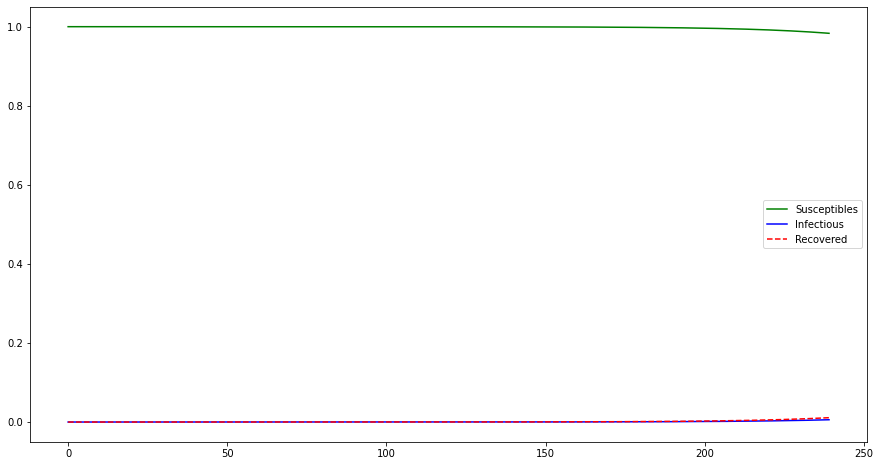

In [ ]:
beta = 0.11 # 0.11 까지는 하향 곡선 제대로 안그려짐
SIR_ = spi.odeint(SIR, Input, np.arange(1, 241))

fig, ax = plt.subplots()
fig.set_size_inches((15,8))
ax.plot(SIR_[:, 0], '-g', label='Susceptibles')
ax.plot(SIR_[:, 1], '-b', label='Infectious')
ax.plot(SIR_[:, 2], '--r', label = 'Recovered')
plt.legend()
plt.show()

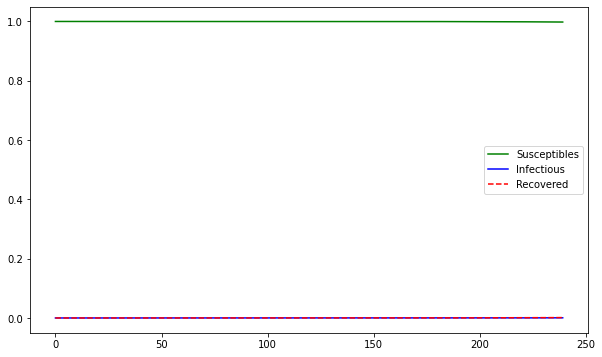

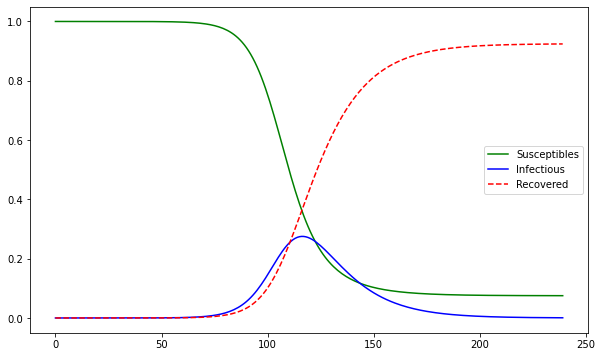

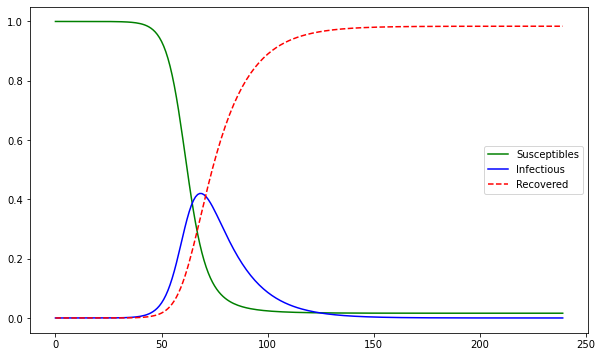

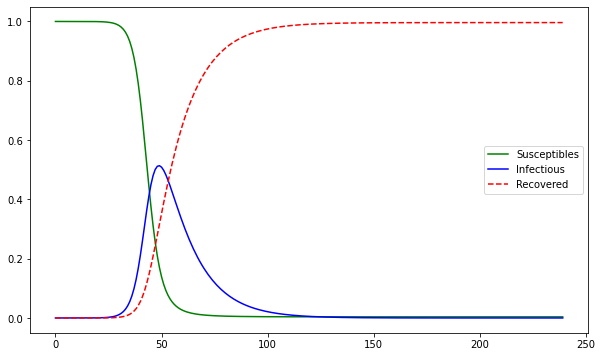

In [ ]:
for b in [0.1, 0.2, 0.3, 0.4]:
  beta = b # 0.11 까지는 하향 곡선 제대로 안그려짐
  SIR_ = spi.odeint(SIR, Input, np.arange(1, 241))

  fig, ax = plt.subplots()
  fig.set_size_inches((10, 6))
  ax.plot(SIR_[:, 0], '-g', label='Susceptibles')
  ax.plot(SIR_[:, 1], '-b', label='Infectious')
  ax.plot(SIR_[:, 2], '--r', label = 'Recovered')
  plt.legend()
  plt.show()

## Various Cases
1) 8월중순 대규모 감염 직전...

In [ ]:
df[df['날짜'] >= '2020-07-15']
# start day, end day 계산 방법 => index + 1
# t = np.arange(start day,end day + 1)
# ytrue = df.iloc[start day -1 : end day ,5].array


,날짜,누적 확진자,누적 사망자,누적 완치자,사망자,확진자,완치자
148,2020-07-15,13551,289,12348,0.0,39.0,66.0
149,2020-07-16,13612,291,12396,2.0,61.0,48.0
150,2020-07-17,13672,293,12460,2.0,60.0,64.0
151,2020-07-18,13711,294,12519,1.0,39.0,59.0
152,2020-07-19,13745,295,12556,1.0,34.0,37.0
...,...,...,...,...,...,...,...
235,2020-10-10,24548,430,22624,2.0,72.0,55.0
236,2020-10-11,24606,432,22693,2.0,58.0,69.0
237,2020-10-12,24703,433,22728,1.0,97.0,35.0
238,2020-10-13,24805,434,22863,1.0,102.0,135.0


In [ ]:
# 7.15~8.15 => index+1 => 149 ~ 180
t = np.arange(149, 181)
ytrue = df.iloc[148:180,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*14))
print('Minimum SS : %.3f' %(min_sq))

Beta hat : 0.121
R : 0.484
Minimum SS : 70790.602


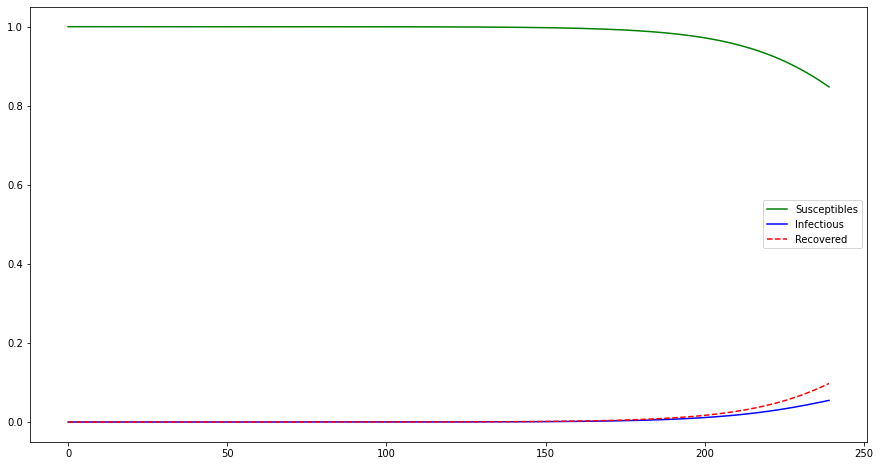

In [ ]:
beta = 0.121 # 0.11 까지는 하향 곡선 제대로 안그려짐 (8개월 기준...)
SIR_ = spi.odeint(SIR, Input, np.arange(1, 241))

fig, ax = plt.subplots()
fig.set_size_inches((15,8))
ax.plot(SIR_[:, 0], '-g', label='Susceptibles')
ax.plot(SIR_[:, 1], '-b', label='Infectious')
ax.plot(SIR_[:, 2], '--r', label = 'Recovered')
plt.legend()
plt.show()

### 전파율 추정 기간 설정 위해서 여러가지 기간 시도

In [ ]:
# 2.18~8.15
t = np.arange(1, 181)
ytrue = df.iloc[0:180,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))

#생각보다 차이 별로 안나는건가...?

Beta hat : 0.081
R : 0.324
Minimum SS : 3943852.353


In [ ]:
# 8.15~9.15
t = np.arange(181, 212)
ytrue = df.iloc[180:211,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*14))
print('Minimum SS : %.3f' %(min_sq))

#생각보다 미세한 차이

Beta hat : 0.168
R : 0.673
Minimum SS : 1780345.198


In [ ]:
# 5.05~8.15
t = np.arange(79, 181)
ytrue = df.iloc[78:180,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))


Beta hat : 0.086
R : 0.344
Minimum SS : 208836.774


In [ ]:
# 5.05~10.17
t = np.arange(79, 241)
ytrue = df.iloc[78:240,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))

Beta hat : 0.087
R : 0.348
Minimum SS : 2433131.569


In [ ]:
# 한달간의 차이 확인
np.arange(1, 28)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [ ]:
betas_monthly = []

t = np.arange(1, 29)
ytrue = df.iloc[0:28,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)
#initial setting 
min_sq = sq_0
beta_lse = 0
# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))
betas_monthly.append(beta_lse)

t = np.arange(29, 61)
ytrue = df.iloc[28:60,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)
#initial setting 
min_sq = sq_0
beta_lse = 0
# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))
betas_monthly.append(beta_lse)



t = np.arange(61, 91)
ytrue = df.iloc[60:90,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)
#initial setting 
min_sq = sq_0
beta_lse = 0
# for loo
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))
betas_monthly.append(beta_lse)

t = np.arange(91, 122)
ytrue = df.iloc[90:121,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)
#initial setting 
min_sq = sq_0
beta_lse = 0
# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))
betas_monthly.append(beta_lse)

t = np.arange(122, 152)
ytrue = df.iloc[121:151,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)
#initial setting 
min_sq = sq_0
beta_lse = 0
# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))
betas_monthly.append(beta_lse)

t = np.arange(152, 183)
ytrue = df.iloc[151:182,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)
#initial setting 
min_sq = sq_0
beta_lse = 0
# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))
betas_monthly.append(beta_lse)

t = np.arange(183, 214)
ytrue = df.iloc[182:213,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)
#initial setting 
min_sq = sq_0
beta_lse = 0
# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))
betas_monthly.append(beta_lse)

t = np.arange(214, 244)
ytrue = df.iloc[213:243,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)
#initial setting 
min_sq = sq_0
beta_lse = 0
# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))
betas_monthly.append(beta_lse)


t = np.arange(244, 275)
ytrue = df.iloc[243:274,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)
#initial setting 
min_sq = sq_0
beta_lse = 0
# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))
betas_monthly.append(beta_lse)

t = np.arange(275, 299)
ytrue = df.iloc[274:298,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)
#initial setting 
min_sq = sq_0
beta_lse = 0
# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*4))
print('Minimum SS : %.3f' %(min_sq))
betas_monthly.append(beta_lse)

Beta hat : 0.188
R : 0.753
Minimum SS : 810759.652
Beta hat : 0.153
R : 0.613
Minimum SS : 2766030.530
Beta hat : 0.071
R : 0.284
Minimum SS : 25011.383
Beta hat : 0.091
R : 0.364
Minimum SS : 17444.620
Beta hat : 0.116
R : 0.464
Minimum SS : 34809.023
Beta hat : 0.116
R : 0.464
Minimum SS : 48913.050
Beta hat : 0.186
R : 0.745
Minimum SS : 1535862.695
Beta hat : 0.149
R : 0.597
Minimum SS : 461757.589
Beta hat : 0.147
R : 0.589
Minimum SS : 197949.205
Beta hat : 0.220
R : 0.881
Minimum SS : 1089008.733


In [ ]:
betas_monthly

[0.1881881881881882,
 0.15315315315315314,
 0.07107107107107107,
 0.09109109109109109,
 0.11611611611611611,
 0.11611611611611611,
 0.18618618618618618,
 0.14914914914914915,
 0.14714714714714713,
 0.22022022022022023]

In [ ]:
# 여기서 월별로 beta 값과 R값에 대해서 플라팅 + 확진자 추이를 같이 시각화 필요

beta_0 = 0.220
beta_1 = beta_0*0.7
beta_2 = beta_0*0.5
beta_3 = beta_0*0.3

# 초기값 349, 

In [ ]:
df.tail(1)

,날짜,누적 확진자,누적 사망자,누적 완치자,사망자,확진자,완치자
297,2020-11-24,31353,510,26722,1.0,349.0,183.0


In [ ]:
gamma =  1/14

# 2/18 31번확진자 나온날 기준으로 초기 SIR 모델 만듦.
I0  = 349; R0 = 183 ;S0  = 51839408-I0 - R0-31353-510-26722;
N = S0 + I0 + R0

S0/= N
I0/= N
R0/= N

Input_ = (S0, I0, R0)
Input_

t = np.arange(1, 150)
beta = beta_0
SIR_= spi.odeint(SIR, Input_, t)
i_b0 = SIR_[:,1]*N
i_b0

array([3.49000000e+02, 4.05052932e+02, 4.70092463e+02, 5.45545910e+02,
       6.32967602e+02, 7.34268034e+02, 8.51856204e+02, 9.88485777e+02,
       1.14691437e+03, 1.33087552e+03, 1.54420155e+03, 1.79179619e+03,
       2.07905724e+03, 2.41216991e+03, 2.79865268e+03, 3.24722209e+03,
       3.76746738e+03, 4.37134704e+03, 5.07153922e+03, 5.88390806e+03,
       6.82652856e+03, 7.91991914e+03, 9.18840746e+03, 1.06601963e+04,
       1.23670687e+04, 1.43471029e+04, 1.66439537e+04, 1.93084210e+04,
       2.23986158e+04, 2.59821713e+04, 3.01384435e+04, 3.49587818e+04,
       4.05489972e+04, 4.70312676e+04, 5.45473070e+04, 6.32613013e+04,
       7.33629233e+04, 8.50714042e+04, 9.86405532e+04, 1.14363905e+05,
       1.32579446e+05, 1.53677383e+05, 1.78106974e+05, 2.06385904e+05,
       2.39108825e+05, 2.76958392e+05, 3.20716913e+05, 3.71278417e+05,
       4.29663313e+05, 4.97031791e+05, 5.74699463e+05, 6.64152056e+05,
       7.67059945e+05, 8.85290972e+05, 1.02092025e+06, 1.17623757e+06,
      

In [ ]:
df[df['날짜'] == '2020-03-21']

,날짜,누적 확진자,누적 사망자,누적 완치자,사망자,확진자,완치자
49,2020-03-21,8799,102,2612,8.0,147.0,379.0


In [ ]:
# 대유행 1

I0  = 1; R0 = 0 ;S0 = 51839408-I0 - R0-25;
N = S0 + I0 + R0

S0/= N
I0/= N
R0/= N

Input = (S0, I0, R0)

# Initial Setting 
t = np.arange(7, 51)
ytrue = df.iloc[6:50,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*14))
print('Minimum SS : %.3f' %(min_sq))


Beta hat : 0.216
R : 3.027
Minimum SS : 3765006.943


In [ ]:
beta = 0.216
SIR_= spi.odeint(SIR, Input, t)
i_b0 = SIR_[:,1]*N
i_b0

array([  1.        ,   1.16475911,   1.36996977,   1.61563203,
         1.90174591,   2.2283114 ,   2.5953285 ,   3.0027972 ,
         3.45071752,   3.97893764,   4.65510579,   5.48033872,
         6.45463642,   7.57799888,   8.85042612,  10.27191814,
        11.84247492,  13.60979603,  15.70514357,  18.15199389,
        20.99976116,  24.28010344,  28.09179211,  32.50004125,
        37.73028604,  43.80586516,  50.72677862,  58.61053614,
        67.88849493,  78.60056696,  90.83893526, 105.23039391,
       121.89273636, 140.87890017, 162.98959107, 188.49457178,
       218.02989758, 252.30595461, 291.66549537, 337.3435287 ,
       390.03577937, 451.09224391, 521.40624038, 603.18188941])

In [ ]:
df[df['날짜'] == '2020-08-15']

,날짜,누적 확진자,누적 사망자,누적 완치자,사망자,확진자,완치자
196,2020-08-15,15039,305,13901,0.0,166.0,38.0


In [ ]:
# 대유행 2

I0  = 36; R0 = 52 ;S0 = 51839408-I0 - R0-14305-301 - 13183;
N = S0 + I0 + R0

S0/= N
I0/= N
R0/= N

Input = (S0, I0, R0)

# Initial Setting 
t = np.arange(182, 198)
ytrue = df.iloc[181:197,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*14))
print('Minimum SS : %.3f' %(min_sq))

In [ ]:
beta = 0.109
SIR_= spi.odeint(SIR, Input, t)
i_b0 = SIR_[:,1]*N
i_b0

array([ 36.        ,  37.38307256,  38.82803875,  40.33493498,
        41.90376126,  43.53451758,  45.22720394,  46.98182034,
        48.79836678,  50.67684327,  52.61784546,  54.63969917,
        56.75105479,  58.9519123 ,  61.24227172,  63.62213303,
        66.09149625,  68.65036136,  71.29872837,  74.03659728,
        76.31688072,  79.43203122,  82.64271508,  85.95306228,
        89.36720282,  92.88926667,  96.52338382, 100.27368427,
       104.14429798, 108.13935495, 112.26815068, 116.55076433,
       120.99544508, 125.60965046, 130.40083801, 135.37646525,
       140.54398971, 145.91086892, 151.4845604 , 157.2725217 ,
       163.28221032, 169.52108382, 176.00196892, 182.73950058,
       189.74297471, 197.02168306, 204.58491739, 212.44196945,
       220.602131  , 229.07469378, 237.86894956, 246.99419008,
       256.4597071 , 266.27556848, 276.47194891, 287.07109764,
       298.08718078, 309.53436441, 321.42681464, 333.77869756,
       346.60417929, 359.9174259 , 373.73260351, 388.06

In [ ]:
df[df['날짜'] == '2020-11-24']

,날짜,누적 확진자,누적 사망자,누적 완치자,사망자,확진자,완치자
297,2020-11-24,31353,510,26722,1.0,349.0,183.0


In [ ]:
# 대유행 3

I0  = 73; R0 = 41 ;S0 = 51839408-I0 - R0-24164-422-21886;
N = S0 + I0 + R0

S0/= N
I0/= N
R0/= N

Input = (S0, I0, R0)

# Initial Setting 
t = np.arange(248, 299)
ytrue = df.iloc[247:298,5].array
beta = 0
SIR_samp_0= spi.odeint(SIR, Input, t)
y_hat = SIR_samp_0[:,1]*N
sq_0 = sum((ytrue - y_hat)**2)

#initial setting 
min_sq = sq_0
beta_lse = 0

# for loop
for b in np.linspace(0,1,1000):
  beta = b
  SIR_samp= spi.odeint(SIR, Input, t)
  y_hat = SIR_samp[:,1]*N
  sq = sum((ytrue - y_hat)**2)
  if (sq < min_sq):
    min_sq = sq_0
    beta_lse = beta
print('Beta hat : %.3f' %(beta_lse))
print('R : %.3f' %(beta_lse*14))
print('Minimum SS : %.3f' %(min_sq))

Beta hat : 0.115
R : 1.612
Minimum SS : 1284715.284


In [ ]:
beta = 0.115
t = np.arange(1, 30)
SIR_= spi.odeint(SIR, Input, t)
i_b0 = SIR_[:,1]*N
i_b0

array([ 73.        ,  76.25386763,  79.65408647,  83.2032168 ,
        86.91353272,  90.77106166,  94.83104635,  99.06219586,
       103.47437664, 108.08349999, 112.89959473, 117.93217772,
       123.19076582, 128.68487591, 134.42402484, 140.41772949,
       146.67550671, 153.20687338, 160.02772714, 167.16127719,
       174.62080629, 182.41936057, 190.56998617, 199.08572925,
       207.97963595, 217.2647524 , 226.95412476, 237.06079916,
       247.61564201])

In [ ]:
0.173*14

In [ ]:
beta_0 = 0.115
beta_1 = beta_0*0.7
beta_2 = beta_0*0.5
beta_3 = beta_0*0.3

In [ ]:
beta = beta_3
t = np.arange(1, 30)
SIR_= spi.odeint(SIR, Input, t)
i_b0 = SIR_[:,1]*N
i_b0

array([73.        , 70.35184319, 67.79895109, 65.34004366, 62.96898434,
       60.69136802, 58.48450783, 56.3612542 , 54.31853095, 52.35327054,
       50.46239649, 48.64283158, 46.89149857, 45.20532021, 43.58121928,
       42.01611855, 40.50694076, 39.0506087 , 37.64404511, 36.28417278,
       34.96932673, 33.70263038, 32.48280009, 31.30798968, 30.17635301,
       29.0860439 , 28.0352162 , 27.02202374, 26.04462036])